# Hollywood Movies: Make random movie sequences

Converts original .tiff sequence into one test and 10 pseudo-randomized .avi scene sequences.
- test sequence:
  - saves .tiff stack simply as "../data/processed/hmov_test.avi"
- training sequence:
  - makes 10 pseudo-random training sequences from the 288 training scenes
    - scene order array (288x10) saved in "..data/processed/RandomSequences.txt"
  - splits each random sequence into 8 parts and save as each part as "../data/processed/hmov_train_[seq#]_[part#].avi"

## TODO: 
- save single scene files
- give unique names test and training part files (expo full file name char limit: 18)

## Setup

In [1]:
# Import libraries
import numpy as np
import imageio
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import json

# Custom module
from utils import load_tiffs_into_array, histogram_equalization

In [2]:
# Set parameters
n_rnd_seqs = 10 # decide on a number of random training sequences

# Get other parameters from meta data file
with open('../data/processed/hmovTrainMeta.json', 'r') as f:
    meta = json.load(f)

fps = meta['general']['fps'] # frames per second
scene_dur = meta['general']['scene_dur_sec'] # scene duration (s)
n_parts = meta['general']['n_parts_train'] # number of parts to split train seq into (see above)

print('fps = %i \nscene_dur = %i \nn_parts = %i \nn_rand_sequs = %i'
      %(fps, scene_dur, n_parts, n_rnd_seqs))

fps = 30 
scene_dur = 5 
n_parts = 8 
n_rand_sequs = 10


## Load histogram equalized test movie scene sequence

In [3]:
start_time = datetime.now() # time code execution

fname = '../data/processed/hmovTest.tiff'
test, test_meta = load_tiffs_into_array(fname, fps, scene_dur)

print('\nDuration: {}'.format(datetime.now() - start_time))

/Users/Yannik/anaconda3/lib/python3.6/site-packages/imageio/plugins/_tifffile.py:7285: UserWarning: module 'imageio.plugins._tifffile' has no attribute 'decode_packbits'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e, warn))
/Users/Yannik/anaconda3/lib/python3.6/site-packages/imageio/plugins/_tifffile.py:7285: UserWarning: module 'imageio.plugins._tifffile' has no attribute 'decode_lzw'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e, warn))
/Users/Yannik/anaconda3/lib/python3.6/site-packages/imageio/plugins/_tifffile.py:7285: UserWarning: module 'imageio.plugins._tifffile' has no attribute 'unpack_ints'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e, warn))
/Users/Yannik/anaconda3/lib/python3.6/site-packages/imageio/plugins/_tifffile.py:7285: UserWarning: module 'imageio.plugins._tifffile' has no attribute 'reverse_bitorder'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e, war

n_frames = 1200
width = 424
height = 264
number of scenes = 8
frames per scene = 150

Putting tiff stack into array:
........
Duration: 0:00:00.405304


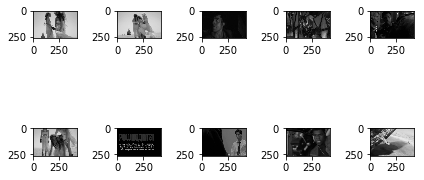

In [4]:
# Show some random image frames
rand_ind = np.random.choice(test_meta['n_frames'],10,replace=False)
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(test[rand_ind[i],:,:], vmin=0, vmax=255, cmap='gray')
    plt.grid(False)
plt.tight_layout()
plt.show()

## Write test video file

In [5]:
fourcc = cv2.VideoWriter_fourcc(*'MJPG') # four-char code for desired codec (MJPG ok for avi on Mac)
writer = cv2.VideoWriter('../data/processed/hmovTest.avi', fourcc, fps, 
                         (test_meta['width'], test_meta['height']), False)

for i in range(test_meta['n_frames']):
    writer.write(test[i,:,:])

writer.release() 

## Load histogram equalized training movie scene sequence

In [6]:
start_time = datetime.now() # time code execution

fname = '../data/processed/hmovTrain.tiff'
train, train_meta = load_tiffs_into_array(fname, fps, scene_dur)

print('\nDuration: {}'.format(datetime.now() - start_time))

n_frames = 43200
width = 424
height = 264
number of scenes = 288
frames per scene = 150

Putting tiff stack into array:
....................................
....................................
....................................
....................................
....................................
....................................
....................................
....................................

Duration: 0:00:20.521179


## Split sequence into scene snippets (5 s)

In [7]:
train_scenes = np.reshape(train, (train_meta['n_scenes'], train_meta['fp_scene'],
                                  train_meta['height'], train_meta['width']))
print('%i scenes, %i frames per scene, %ix%i frames' % train_scenes.shape)

288 scenes, 150 frames per scene, 264x424 frames


## Get random sequence index file

In [8]:
np.random.seed(345) # fix random seed

random = np.tile(np.arange(train_meta['n_scenes']), (n_rnd_seqs,1)).T
for i in range(random.shape[1]):
    random[:,i] = np.random.permutation(random[:,i])
random.shape

# Save file
np.savetxt('../data/processed/RandomSequences.txt', random, fmt='%u', delimiter='\t')
# random = np.loadtxt('../data/processed/RandomSequences.txt', dtype=np.int, delimiter='\t')

print('Random sequence index for %i scenes and %i sequences.' % random.shape)
print('Example scene sequence:\n', random[:,0])

Random sequence index for 288 scenes and 10 sequences.
Example scene sequence:
 [131 253 146 283 100 251 193  10  90 160 181   5  97 194  53  49   9 285
  19 147 123  51 166 269  60 138 271 162 101 119 141  50 185 273 281 228
 152 188  77  40 261 257 226 216   0 109 144 219  94  65  89 167  30 220
  47 174 108  64  20 112 159 263 164 148   8  16  48 110 124 264  55 145
  84 179  78  13 177 178 149  32 158  95 128 195 196  27  31 125 153 114
 106 238 105 250 135 134 270 272 187 274 243 278  56 232 155 224 258 190
 116  68  33  72  93 150 129 204 275 121 236  34  71  63  98 222 165 210
 266 230  44 282   3  57 202 239 248 214  92 143 186 127 191 245  38 111
 247  82  52 122  81 205 173 212  25  91 102 163 240 172 256 201 211  87
  18 237  14  45 115 198 267 184  29   1 118 218 286   7  73 234 254  99
 284 157  85 132  35 180 136  39 208 252 227 223  36  70   6 209 197  11
 140 262  23 260 176 117 221  74 171 233 130 235  26 113  79  15 161 103
 246  61 276 168 151 249 229 182 241 231 217

## Write training video files

In [10]:
print('Creating %i random sequences.' %n_rnd_seqs)

Creating 10 random sequences.


In [12]:
print('Creating random sequence %i/%i:' %(i+1, n_rnd_seqs))

Creating random sequence 10/10:


In [9]:
# Write one file for each random sequence, split into n parts.

start_time = datetime.now() # time code execution

print('Creating %i random sequences.' %n_rnd_seqs)
for i in range(random.shape[1]):
    print('Creating random sequence %i/%i:' %(i+1, n_rnd_seqs))
    train_scenes_rand = train_scenes[list(random[:,i]),:,:,:]
    train_scenes_rand = np.reshape(train_scenes_rand, 
                                   (train_meta['n_frames'],train_meta['height'],train_meta['width']))
    
    # Split into parts
    parts = np.array_split(train_scenes_rand, n_parts)
    print(' Splitting training sequence into %i parts:' %n_parts)
        
    for j, part in enumerate(parts):
        # Make video (of each part)
        fname = '../data/processed/' + 'hmovTrain_' + str(i+1).zfill(2) + '-' + str(j+1) + '.avi'
        print('  Making video file:', fname)
        fourcc = cv2.VideoWriter_fourcc(*'MJPG') # four-char code for codec (MJPG ok for avi on Mac)
        writer = cv2.VideoWriter(fname, fourcc, fps, 
                                 (train_meta['width'], train_meta['height']), False)

        for frame in part:
            writer.write(frame)

        writer.release()

print('Duration: {}'.format(datetime.now() - start_time))

Creating random sequence: 1
 Splitting training sequence into 8 parts
  Making video file: ../data/processed/hmovTrain_01-1.avi
  Making video file: ../data/processed/hmovTrain_01-2.avi
  Making video file: ../data/processed/hmovTrain_01-3.avi
  Making video file: ../data/processed/hmovTrain_01-4.avi
  Making video file: ../data/processed/hmovTrain_01-5.avi
  Making video file: ../data/processed/hmovTrain_01-6.avi
  Making video file: ../data/processed/hmovTrain_01-7.avi
  Making video file: ../data/processed/hmovTrain_01-8.avi
Creating random sequence: 2
 Splitting training sequence into 8 parts
  Making video file: ../data/processed/hmovTrain_02-1.avi
  Making video file: ../data/processed/hmovTrain_02-2.avi
  Making video file: ../data/processed/hmovTrain_02-3.avi
  Making video file: ../data/processed/hmovTrain_02-4.avi
  Making video file: ../data/processed/hmovTrain_02-5.avi
  Making video file: ../data/processed/hmovTrain_02-6.avi
  Making video file: ../data/processed/hmovTrain